In [70]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import glob

### Open Data

In [71]:
def get_data_from_mseed(training_path, csv_file):
    mseed_files = glob.glob(os.path.join(training_path, "*.mseed"))
    data_list = []
    target_df = pd.read_csv(csv_file)

    for mseed_file in mseed_files:
        stream = read(mseed_file)
        filename = os.path.basename(mseed_file).rstrip(".mseed")
        # print(f"Processing: {filename}")
        
        if 'filename' not in target_df.columns or 'time_rel(sec)' not in target_df.columns:
            # print(f"Error: Columns 'filename' or 'time_rel(sec)' not found in target DataFrame.")
            continue
        
        target_df['filename'] = target_df['filename'].str.replace('.csv', '', regex=False)
        matching_rows = target_df[target_df['filename'] == filename]
        if matching_rows.empty:
            # print(f"Warning: No matching filename found in the target DataFrame for {filename}. Skipping this file.")
            continue

        try:
            target = matching_rows['time_rel(sec)'].iloc[0]
        except IndexError:
            # print(f"Error: No 'time_rel(sec)' value found for filename {filename}. Skipping this file.")
            continue

        for trace in stream:
            row = {
                "file_name": filename,  # File name without path
                "rel_times": trace.times(),
                "data": trace.data,
                "start_time": trace.stats.starttime,  # Absolute start time
                "end_time": trace.stats.endtime,      # Absolute end time
                "target": target,                     # Target value for the filename
            }
            data_list.append(row)

    df = pd.DataFrame(data_list)
    # print("Final DataFrame:\n", df)
    return df

In [72]:
def get_data(training_folders, catalog_folders):
    df = pd.DataFrame()
    for training_folder, catalog_folder in zip(training_folders, catalog_folders):
        new_df = get_data_from_mseed(training_folder, catalog_folder)
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
    print(df)
    return df

train_data = get_data(['./data/lunar/training/data/S12_GradeA/', './data/mars/training/data/'], 
                      ['./data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv', './data/mars/training/catalogs/Mars_InSight_training_catalog_final.csv'])

                                  file_name  \
0    xa.s12.00.mhz.1970-01-19HR00_evid00002   
1    xa.s12.00.mhz.1970-03-25HR00_evid00003   
2    xa.s12.00.mhz.1970-03-26HR00_evid00004   
3    xa.s12.00.mhz.1970-04-25HR00_evid00006   
4    xa.s12.00.mhz.1970-04-26HR00_evid00007   
..                                      ...   
72   xa.s12.00.mhz.1975-05-04HR00_evid00192   
73   xa.s12.00.mhz.1975-06-24HR00_evid00196   
74   xa.s12.00.mhz.1975-06-26HR00_evid00198   
75  XB.ELYSE.02.BHV.2022-01-02HR04_evid0006   
76  XB.ELYSE.02.BHV.2022-02-03HR08_evid0005   

                                            rel_times  \
0   [0.0, 0.1509433962264151, 0.3018867924528302, ...   
1   [0.0, 0.1509433962264151, 0.3018867924528302, ...   
2   [0.0, 0.1509433962264151, 0.3018867924528302, ...   
3   [0.0, 0.1509433962264151, 0.3018867924528302, ...   
4   [0.0, 0.1509433962264151, 0.3018867924528302, ...   
..                                                ...   
72  [0.0, 0.1509433962264151, 0.3018

In [73]:
def get_data_from_mseed_test(test_path):
    mseed_files = glob.glob(os.path.join(test_path, "*.mseed"))
    data_list = []

    for mseed_file in mseed_files:
        stream = read(mseed_file)
        filename = os.path.basename(mseed_file).rstrip(".mseed")
        # print(f"Processing: {filename}")

        for trace in stream:
            row = {
                "file_name": filename,  # File name without path
                "rel_times": trace.times(),
                "data": trace.data,
                "start_time": trace.stats.starttime,  # Absolute start time
                "end_time": trace.stats.endtime,      # Absolute end time
            }
            data_list.append(row)

    df = pd.DataFrame(data_list)
    # print("Final DataFrame:\n", df)
    return df

In [74]:
def get_test_data(test_folders):
    df = pd.DataFrame()
    for test_folder in test_folders:
        new_df = get_data_from_mseed_test(test_folder)
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
    print(df)
    return df

test_data = get_test_data(['./data/lunar/test/data/S12_GradeB/', './data/lunar/test/data/S15_GradeA/', './data/lunar/test/data/S15_GradeB/', 
                           './data/lunar/test/data/S16_GradeA/', './data/lunar/test/data/S16_GradeB/', './data/mars/test/data/'])

                                   file_name  \
0     xa.s12.00.mhz.1969-12-16HR00_evid00006   
1     xa.s12.00.mhz.1970-01-09HR00_evid00007   
2     xa.s12.00.mhz.1970-02-07HR00_evid00014   
3     xa.s12.00.mhz.1970-02-18HR00_evid00016   
4     xa.s12.00.mhz.1970-03-14HR00_evid00018   
..                                       ...   
100  XB.ELYSE.02.BHV.2021-05-02HR01_evid0017   
101  XB.ELYSE.02.BHV.2021-10-11HR23_evid0011   
102  XB.ELYSE.02.BHV.2021-12-24HR22_evid0007   
103  XB.ELYSE.02.BHV.2022-04-09HR22_evid0002   
104  XB.ELYSE.02.BHV.2022-05-04HR23_evid0001   

                                             rel_times  \
0    [0.0, 0.1509433962264151, 0.3018867924528302, ...   
1    [0.0, 0.1509433962264151, 0.3018867924528302, ...   
2    [0.0, 0.1509433962264151, 0.3018867924528302, ...   
3    [0.0, 0.1509433962264151, 0.3018867924528302, ...   
4    [0.0, 0.1509433962264151, 0.3018867924528302, ...   
..                                                 ...   
100  [0.0, 0.05, 

In [60]:
def display_sample(df, rand=True):
    random_row = df.sample(n=1) if rand else df.sample(n=1, random_state=42)
    plt.figure(figsize=(8, 6))
    row = random_row.iloc[0]

    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(row['rel_times'], row['data'])
    try:
        ax.axvline(x = row['target'], color='red',label='Rel. Arrival')
        ax.legend(loc='upper left')
    except:
        print('No target in this row')
    ax.set_xlim([min(row['rel_times']),max(row['rel_times'])])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_title(row['file_name'], fontweight='bold')

<Figure size 800x600 with 0 Axes>

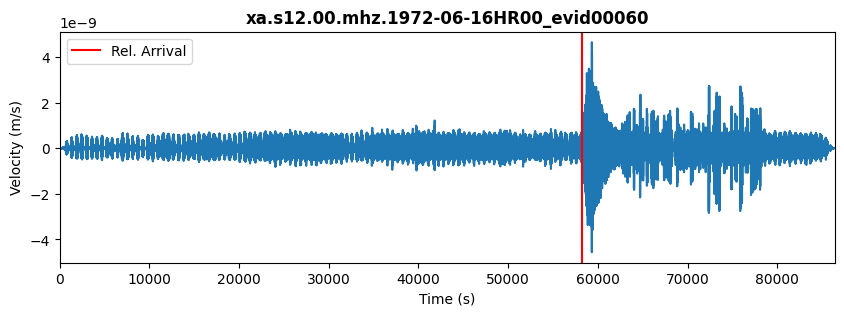

In [64]:
display_sample(train_data)

In [69]:
mseed_file = './downloads_mseeds/B921/PB.B921..EH1__20200901T000000Z__20200902T000000Z.mseed'
stream = read(mseed_file)
filename = os.path.basename(mseed_file).rstrip(".mseed")

print(type(stream))
print(stream)
print(stream[0].stats)

<class 'obspy.core.stream.Stream'>
1 Trace(s) in Stream:
PB.B921..EH1 | 2020-09-01T00:00:00.008300Z - 2020-09-01T23:59:59.998300Z | 100.0 Hz, 8640000 samples
         network: PB
         station: B921
        location: 
         channel: EH1
       starttime: 2020-09-01T00:00:00.008300Z
         endtime: 2020-09-01T23:59:59.998300Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8640000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 2293, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 9392128})
